# Capstone 1: Airbnb in New York City

## Introduction:
   
   New York city is one of the best attractions for tourism and vacation in the world. In the past, visitors used to book hotel or resorts to stay overnight, but recently, airbnb has provided people with an option where they can choose to stay as their need and preference, for example: in a house or just a room or for any flexible period of time. Airbnb is growing rapidly because it is convenient to book and customers can choose their place based on their priorities, or their need.
    
   Lets explore 'Airbnb in New york city' data, and find which neighbourhood group has higher price for Airbnb, what kind of room type is preferred, and if people save money by staying near to the main city and or by staying farther. 

### Libraries Used:

In [313]:
import numpy as np #linear algebra libraries
import pandas as pd #for dataframe
import matplotlib.pyplot as plt #to plot different graphs
%matplotlib inline 
import statistics as st # to find mode
from scipy.stats import ttest_ind #to find t-value and p-value

### Reading the CSV files:

In [314]:
airbnb = pd.read_csv('AB_NYC_2019.csv') #reading csv file
airbnb


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [315]:
#to find size of data, how many rows and columns are there
airbnb.shape

(48895, 16)

There is 48895 rows and 16 columns 

In [316]:
# Check the head of airbnb
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [317]:
#checking the last few data of airbnb
airbnb.tail(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### EDA:

In [318]:
#Check the info() of the df
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

  From the information above, we can see that id and host_id count is the same which means that there is a host id for all id present, but the host name count is lower than the total id, which might be because same host mights have multiple host ids. Last review and reviews per month has the same count, so data was taken for only review per month for only the last reviews taken, and not for all number of reviews.
        
  None of the data is missing, because they are all non-null. There are different type of data types, like float with decimal point, integers with actual number, and object with words.
    

#### How many unique host id is there? 

In [319]:
airbnb['host_id'].nunique() #to find how many different host id is used in new york Airbnb

37457

EDA data shows that there is a lower count of host name than host_id. We can conclude that one host may have multiple host ids. From the information above, the total unique host id count = 37457, which is lower than host id i.e. 48895, that means, may be hosts are using the same host id for different locations as well. 

#### D

In [320]:
#to generate descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.
des_airbnb=airbnb.describe() #to view some basic statistical details like percentile, mean, std etc. of CSV file
des_airbnb

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Here, the highest "minimum nights" count is 1250, which is strange. Many people go for a vacation or outing for a few days or a few weeks but not for an extended period or months or years. It could be that the data collection had errors or a typo. This particular outlier data nedes to be fixed, if not, then it will generate a wrong visualization, which might lead to a wrong prediction.

Standard deviation of latitude and longitude is really small, that means that the data is dispersed nearby, and since the data was taken from New York City only, which is comparitively a small area, this could be the reason for smaller standard deviation.

Standard deviation for price, minimum nights, number of reviews is really high which means that the value could go to a negative count which is practically odd for a price to be paid for airbnb services, nights that has been spent in as airbnb, or for the number of reviews that has been taken. This only means the the data has a lot of varience. There are higher reviews count near towards zero or the higher reviews that is higher than 100, which might have fluctuated the standard deviation of number of reviews. 


In [321]:
#detail of airbnb hosted with highest minimum nights of airbnb stay
airbnb[airbnb['minimum_nights']== airbnb['minimum_nights'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


Now we know 1250 nights doesn't make sense for minimum night of stay in airbnb.  Lets check out if minimum nights data has normal distribution or not?

In [322]:
#finding mean, std, and total count of minimum nights
mean_minnight = airbnb['minimum_nights'].mean()
std_minnight = airbnb['minimum_nights'].std()
count_minnight = airbnb['minimum_nights'].count()
add = mean_minnight + std_minnight # adding mean and mean+std
sub = mean_minnight - std_minnight #subtracting mean and mean+std
#printing all out
print(mean_minnight)
print(std_minnight)
print(count_minnight)
print(add)
print(sub)

7.029962163820431
20.510549533180445
48895
27.540511697000877
-13.480587369360013


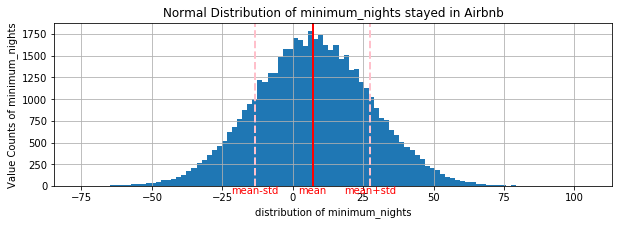

In [323]:
# visualization of minimum nights distribution using random normal distribution

airbnb['night_var']=np.random.normal(mean_minnight, std_minnight, count_minnight)

# Creating histogram to visualize normal distribution
airbnb['night_var'].hist(figsize = (10,3), bins=100)
plt.xlabel('distribution of minimum_nights')
plt.ylabel('Value Counts of minimum_nights')
plt.title('Normal Distribution of minimum_nights stayed in Airbnb')

#adding vertical line to mean, mean+std, and mean-std to make it clear
plt.axvline(mean_minnight, color='r', linestyle='-', linewidth= 2)
plt.axvline(mean_minnight+ std_minnight, color= 'pink', linestyle = '--', linewidth = 2)
plt.axvline(mean_minnight - std_minnight, color = 'pink', linestyle= '--', linewidth = 2)

#adding mean, mean+std, and mean-std as a text in place of mean, mean+std, and mean-std
plt.text(mean_minnight, -1, 'mean', ha = 'center', va = 'top', color = 'red')
plt.text( mean_minnight+ std_minnight, -1, 'mean+std', ha = 'center', va = 'top', color = 'r')
plt.text(mean_minnight - std_minnight, -1, 'mean-std', ha = 'center', va = 'top', color = 'r')

plt.show()



The distribution of minimum night looks normal and is equally distributed.

Next, check with the cleaning minimum nights data and see the distribution:

In [324]:
#cleanup process for maximum nights
#fixing 1250 to 13 nights
airbnb.loc[5767, 'minimum_nights']= 13

In [325]:
#checking if the number is changed or not?
airbnb.loc[5767, 'minimum_nights']

13

In [326]:
#checking if maximum night of minimum night stay is changed or not?
airbnb[airbnb['minimum_nights']== airbnb['minimum_nights'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.0162,Entire home/apt,400,1000,0,NaN,NaN,1,362,-12.766168


There is still another maximum amount of minimum night, which doesn't make any sense, lets fix this minimum night data and see if there is more minimum nights that doesn't make sense.

In [327]:
#cleanup process for maximum nights
#fix 1000 to 10 nights
airbnb.loc[2854, 'minimum_nights']= 10

In [328]:
#checking if maximum night of minimum night stay is changed or not?
airbnb[airbnb['minimum_nights']== airbnb['minimum_nights'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42,1.415265
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249,-16.282515
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,NaN,1,365,2.685747


In [329]:
#cleanup process for maximum nights
#fix 1000 to 10 nights
airbnb[airbnb['minimum_nights']== 999] = 10

In [330]:
#checking if maximum night of minimum night stay is changed or not?
airbnb[airbnb['minimum_nights']== airbnb['minimum_nights'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90,-17.444336
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,NaN,1,362,-8.213456
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365,23.804321
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaN,NaN,1,358,-20.886361
47620,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,NaN,1,331,2.666119


In [331]:
#cleanup process for maximum nights
#fix 1000 to 10 nights
airbnb[airbnb['minimum_nights']== 500] = 5

In [332]:
#checking if maximum night of minimum night stay is changed or not?
airbnb[airbnb['minimum_nights']== airbnb['minimum_nights'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
10829,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,NaN,NaN,1,365,9.853346


In [333]:
#cleanup process for maximum nights
#fix 1000 to 10 nights
airbnb[airbnb['minimum_nights']== 480] = 5

In [334]:
#checking if maximum night of minimum night stay is changed or not?
airbnb[airbnb['minimum_nights']== airbnb['minimum_nights'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
34487,27362309,Not available,14621589,Sol,Brooklyn,Bedford-Stuyvesant,40.69974,-73.94658,Private room,50,400,0,NaN,NaN,1,90,-21.691478


In [335]:
#cleanup process for maximum nights
#fix 1000 to 10 nights
airbnb[airbnb['minimum_nights']== 400] = 4

In [336]:
#checking if maximum night of minimum night stay is changed or not?
airbnb[airbnb['minimum_nights']== airbnb['minimum_nights'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
1305,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365,10.226781


After fixing several minimum nights count that seemed odd, still the minimum night count is high in number which doesn't happen in practical life. It looks like the data might had collection or type errors or may be the minimum night was supposed to be the total night of stay in a year in that particular airbnb listing. The data is not clear enough to be used for further analysis, because it doesn't look reliable to get the conclusion.

So, now, move to see which airbnb cost the highest!

In [337]:
#lets go over and look for the maximum price paid, to find the neighbourhood with highest price
airbnb[airbnb['price']== airbnb['price'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,15.300055
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,27.213688
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83,-9.753926


From the data above, the highest cost per night for an airbnb was listed in Queens, Brooklyn, and Manhattan area.


Now, lets see which neighbourhood group has higher average price paid for an airbnb.

In [338]:
#average price spent in different city in NYC
airbnb.groupby('neighbourhood_group').mean()['price']

neighbourhood_group
4                  4.000000
5                  5.000000
10                10.000000
Bronx             87.496792
Brooklyn         124.396040
Manhattan        196.889971
Queens            99.493997
Staten Island    114.812332
Name: price, dtype: float64

The data above, shows that some neighbourhood group have a numerical value, which is supposed to be an object not an integer. Values 4,5, and 10 here might be the wrong data and needs to be fixed.

First, Let's double check with the value counts if those integers come as a neighbourhood group or not?

In [339]:
airbnb['neighbourhood_group'].value_counts() #finding total count of neighbourhood group for airbnb

Manhattan        21658
Brooklyn         20099
Queens            5664
Bronx             1091
Staten Island      373
5                    6
10                   3
4                    1
Name: neighbourhood_group, dtype: int64

And yes it does!

In [340]:
#Checking neighbourhood 5, to drop the rows
airbnb[airbnb['neighbourhood_group'] == 5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
7355,5,5,5,5,5,5,5.0,5.0,5,5,5,5,5,5.0,5,5,5.0
8014,5,5,5,5,5,5,5.0,5.0,5,5,5,5,5,5.0,5,5,5.0
10829,5,5,5,5,5,5,5.0,5.0,5,5,5,5,5,5.0,5,5,5.0
11193,5,5,5,5,5,5,5.0,5.0,5,5,5,5,5,5.0,5,5,5.0
14285,5,5,5,5,5,5,5.0,5.0,5,5,5,5,5,5.0,5,5,5.0
47620,5,5,5,5,5,5,5.0,5.0,5,5,5,5,5,5.0,5,5,5.0


In [341]:
#running neighbourhood group 10, to drop the rows
airbnb[airbnb['neighbourhood_group'] == 10]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
13404,10,10,10,10,10,10,10.0,10.0,10,10,10,10,10,10.0,10,10,10.0
26341,10,10,10,10,10,10,10.0,10.0,10,10,10,10,10,10.0,10,10,10.0
38664,10,10,10,10,10,10,10.0,10.0,10,10,10,10,10,10.0,10,10,10.0


In [342]:
#running neighbourhood group 4, to drop tha rows
airbnb[airbnb['neighbourhood_group'] == 4]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_var
34487,4,4,4,4,4,4,4.0,4.0,4,4,4,4,4,4.0,4,4,4.0


All neighbourhood group is located now, processing cleanup with all the wrong data by dropping those rows with 4,5, and, 10 integers .

In [343]:
#using drop to delete rows with 4,5,and 10 integers.
airbnb.drop([7355,8014,10829,11193,14285,47620,13404,26341,38664,34487], inplace=True)

In [344]:
#Running value count and mean of neghbourhood group after dropping wrong ones
Count_neighbourhood = airbnb['neighbourhood_group'].value_counts() #total count of neighbourhood group
avg_price_neighbourhood = airbnb.groupby('neighbourhood_group',as_index=False)['price'].mean()#mean price of neighbourhood group
sum_price_neighbourhood = airbnb.groupby('neighbourhood_group',as_index=False)['price'].sum()#total sum of price for given neighbourhood group
#print all 
print(Count_neighbourhood)
print(avg_price_neighbourhood)
print(sum_price_neighbourhood)
print(airbnb.shape)

Manhattan        21658
Brooklyn         20099
Queens            5664
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
  neighbourhood_group       price
0               Bronx   87.496792
1            Brooklyn  124.396040
2           Manhattan  196.889971
3              Queens   99.493997
4       Staten Island  114.812332
  neighbourhood_group    price
0               Bronx    95459
1            Brooklyn  2500236
2           Manhattan  4264243
3              Queens   563534
4       Staten Island    42825
(48885, 17)


Visualization of Distribution of price and histogram of price in certain neighbourhood group and different room type:

In [345]:
#finding mean, std, and total count of price
mean_price = airbnb['price'].mean()#average price 
std_price = airbnb['price'].std()#standard deviation of price
count_price = airbnb['price'].count()#total count of price cell
add_price = mean_price + std_price # adding mean and mean+std
sub_price = mean_price - std_price #subtracting mean and mean+std
#printing all out
print(mean_price)
print(std_price)
print(count_price)
print(add)
print(sub)

152.73186048890253
240.17653670539985
48885
27.540511697000877
-13.480587369360013


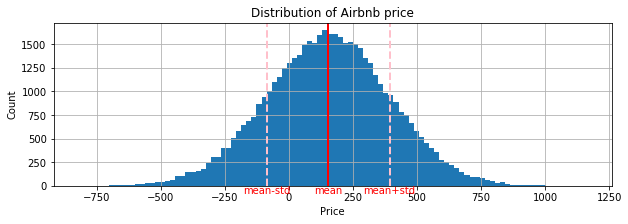

In [346]:
# visualization of normal distribution of price 

airbnb['var_price']=np.random.normal(mean_price, std_price, count_price) # for normal distribution

# Finally, create histogram
airbnb['var_price'].hist(figsize=(10,3), bins=100) 
plt.xlabel('Price') # labelling x-axis
plt.ylabel('Count') #labelling y-axis
plt.title('Distribution of Airbnb price') #labelling title of histogram

#adding vertical line to mean, mean+std, and mean-std to make it clear
plt.axvline(mean_price, color='r', linestyle='-', linewidth= 2) # showing th average price in distribution with red line
plt.axvline(add_price, color= 'pink', linestyle = '--', linewidth = 2) #showing mean+std in graph
plt.axvline(sub_price, color = 'pink', linestyle= '--', linewidth = 2) #showing mean-std in graph

#adding mean, mean+std, and mean-std as a text in place of mean, mean+std, and mean-std
plt.text(mean_price, -1, 'mean', ha = 'center', va = 'top', color = 'red') #plotting text to show the line is mean
plt.text( add_price, -1, 'mean+std', ha = 'center', va = 'top', color = 'r') #plotting text to show the line is mean+std
plt.text(sub_price, -1, 'mean-std', ha = 'center', va = 'top', color = 'r') #plotting text to show the line is mean-std

plt.show()


Price is relatively similar and distributed normally.

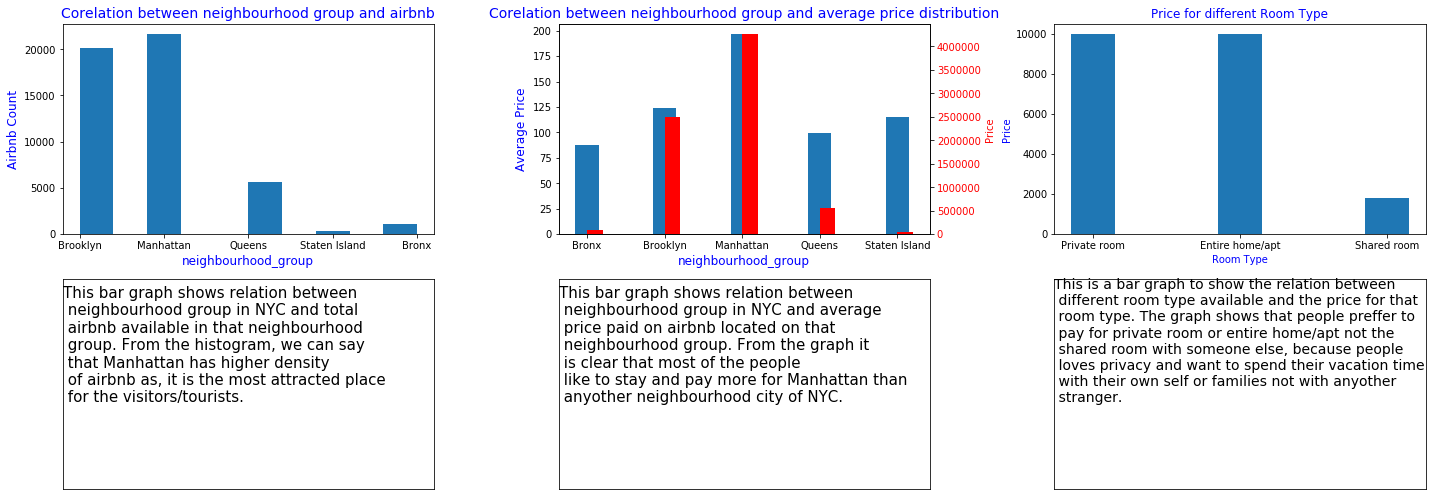

In [363]:
#plotting scatter graph to show co-relation between neighbourhood_group, minimum_nights of stay and its price.
fig = plt.figure(figsize=(20,7)) #plotting blank figure with figure size

#first plot
plt.subplot(2,3,1) #plotting subplot 1 with 2 rows, 3 columns
plt.hist([airbnb['neighbourhood_group']], histtype = 'bar') #bar type histogram
plt.xlabel('neighbourhood_group', fontsize=12, color='b')   #x-axis label
plt.ylabel('Airbnb Count', fontsize=12, color='b')  #y-axis label
plt.title('Corelation between neighbourhood group and airbnb', fontsize=14, color='b') #title

#second plot
plt.subplot(2,3,2)  #plotting subplot 2 with 2 rows, 3 columns
plt.bar(avg_price_neighbourhood['neighbourhood_group'], avg_price_neighbourhood['price'], width = 0.3) #bar graph
plt.xlabel('neighbourhood_group', fontsize=12, color='b') #x-axis label
plt.ylabel('Average Price', fontsize=12, color='b')  #y-axis label
plt.title('Corelation between neighbourhood group and average price distribution', fontsize=14, color='b') #title
plt.twinx() #twinning the graph, making another graph inside the first graph
color = 'r' #twin graph with red color
plt.ylabel('Price', color=color)  # we already handled the x-label with ax1, y-axis label only
plt.bar(sum_price_neighbourhood['neighbourhood_group'], sum_price_neighbourhood['price'], width = 0.2,align ='edge', color=color ) #bar graph
plt.tick_params(axis='y', labelcolor=color) #plotting coordinate for y-axis
plt.tight_layout() #for clear layout

#fourth plot with text on it for plot first
plt.subplot(2,3,4)  #plotting subplot 4 with 2 rows, 3 columns
plt.xticks(()) # to create x-axis with no coordinates
plt.yticks(()) # to create y-axis with no coordinates
plt.text(0, 0.4,'This bar graph shows relation between\n neighbourhood group in NYC and total \n airbnb available in that neighbourhood \n group. From the histogram, we can say\n that Manhattan has higher density \n of airbnb as, it is the most attracted place \n for the visitors/tourists.',  size=15, ha='left', va='bottom')

#fifth plot with text on it for plot second
plt.subplot(2,3,5)  #plotting subplot 5 with 2 rows, 3 columns
plt.xticks([])  # to create x-axis with no coordinates
plt.yticks([])  # to create y-axis with no coordinates
plt.text(0, 0.4,'This bar graph shows relation between \n neighbourhood group in NYC and average \n price paid on airbnb located on that \n neighbourhood group. From the graph it \n is clear that most of the people \n like to stay and pay more for Manhattan than \n anyother neighbourhood city of NYC.',  size=15, ha='left', va='bottom')

#third plot
plt.subplot(2,3,3)  #plotting subplot 3 with 2 rows, 3 columns
plt.bar(airbnb['room_type'],airbnb['price'], width=0.3) #bar graph
plt.xlabel('Room Type', color = 'b')
plt.ylabel('Price', color = 'b')
plt.title('Price for different Room Type', color = 'b')

#sixth plot with text on it for plot third
plt.subplot(2,3,6)  #plotting subplot 6 with 2 rows, 3 columns
plt.xticks(())  # to create x-axis with no coordinates
plt.yticks(())  # to create y-axis with no coordinates
plt.text(0, 0.4, 'This is a bar graph to show the relation between \n different room type available and the price for that \n room type. The graph shows that people preffer to \n pay for private room or entire home/apt not the \n shared room with someone else, because people \n loves privacy and want to spend their vacation time \n with their own self or families not with anyother \n stranger.',size=14, ha='left', va='bottom')
plt.show()
  

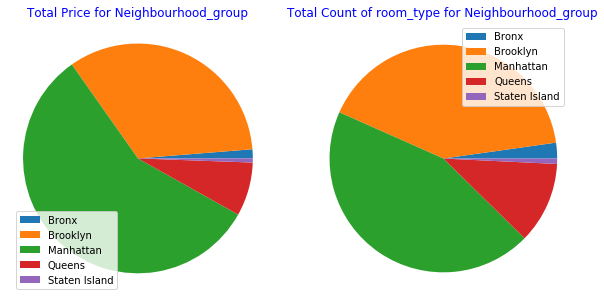

In [349]:
fig=plt.figure(figsize=(10, 5)) #plotting blank figure 

plt.subplot(1,2,1) #to plot first subplot with 1 row and 2 column
avg_neigh_price = airbnb.groupby('neighbourhood_group',as_index=False)['price'].sum() #grouping neighbourhood group by sum of price
plt.pie(avg_neigh_price['price']) #pie graph
plt.axis('equal')  # 
plt.title('Total Price for Neighbourhood_group', color = 'b')
plt.legend(avg_neigh_price['neighbourhood_group']) #legend in color code to figure out which color for what neighbourhood group

plt.subplot(1,2,2) #to plot second subplot with 1 row and 2 column
avg_neigh_price_ = airbnb.groupby('neighbourhood_group',as_index=False)['room_type'].count() #grouping neighbourhood group by room type
plt.pie(avg_neigh_price_['room_type']) #pie graph
plt.axis('equal') # to make pie drawn as circle
plt.title('Total Count of room_type for Neighbourhood_group', color = 'b')
plt.legend(avg_neigh_price.neighbourhood_group) #legend in color code to figure out which color for what neighbourhood group


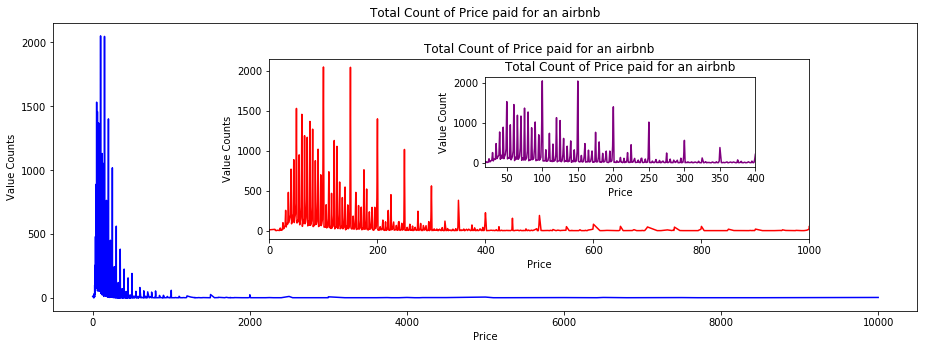

In [377]:
fig = plt.figure(figsize=(15,5)) #blank figure

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.3, 0.3, 0.5, 0.5]) # inset axes
axes3 =  fig.add_axes([0.5,0.5,0.25,0.25]) #second inset axes
# Larger Figure Axes 1
axes1.plot(airbnb['price'].value_counts().sort_index(), 'b') #original graph with total value count of price in descending order
axes1.set_xlabel('Price') #x-axis
axes1.set_ylabel('Value Counts') #y-axis
axes1.set_title('Total Count of Price paid for an airbnb') #title

# Inserting Figure Axes 2
axes2.plot(airbnb['price'].value_counts().sort_index(),'r') #frist inset graph with total value count of price in descending order
axes2.set_xlim(0, 1000) # x-limit of 1000
axes2.set_xlabel('Price') #x-axis 
axes2.set_ylabel('Value Counts') #y-axis
axes2.set_title('Total Count of Price paid for an airbnb') #title

# Inserting Figure Axes 3
axes3.plot(airbnb['price'].value_counts().sort_index(),'purple')#second inset graph with total value count of price in descending order
axes3.set_xlim(20, 400) #x-limit from 20 to 400
axes3.set_xlabel('Price') #x-axis
axes3.set_ylabel('Value Count') #y-axis
axes3.set_title('Total Count of Price paid for an airbnb') #title

plt.show()

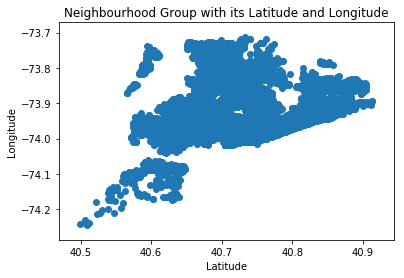

In [379]:

plt.scatter(airbnb['latitude'], airbnb['longitude']) #ploting scatter to see geographical view of NYC
plt.xlabel('Latitude') #x-axis
plt.ylabel('Longitude') #y-axis
plt.title('Neighbourhood Group with its Latitude and Longitude') #title
plt.show()

Boxplot to see??

(0, 410)

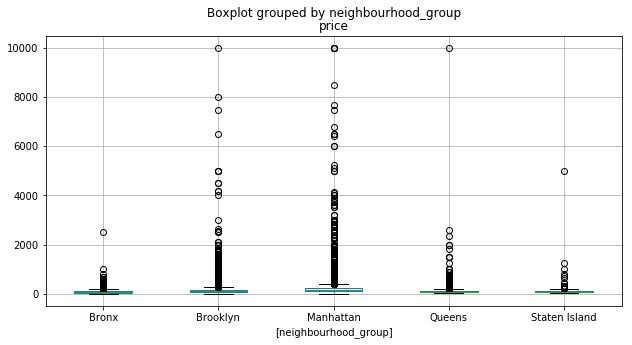

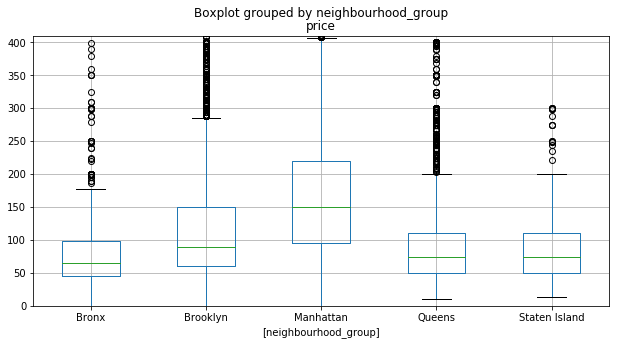

In [254]:
#visualization through boxplot
airbnb[['neighbourhood_group', 'price']].boxplot(by='neighbourhood_group', figsize=(10,5))
airbnb[['neighbourhood_group', 'price']].boxplot(by='neighbourhood_group', figsize=(10,5))
plt.ylim(0,410)


(0, 400)

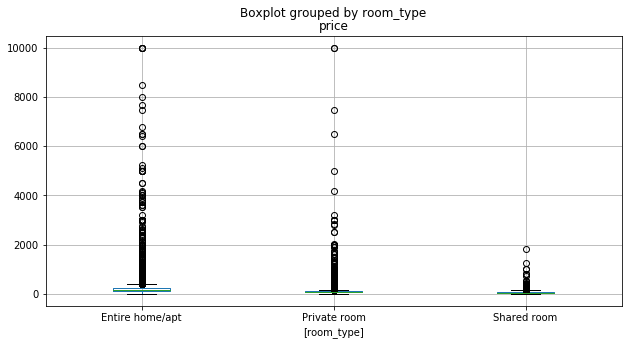

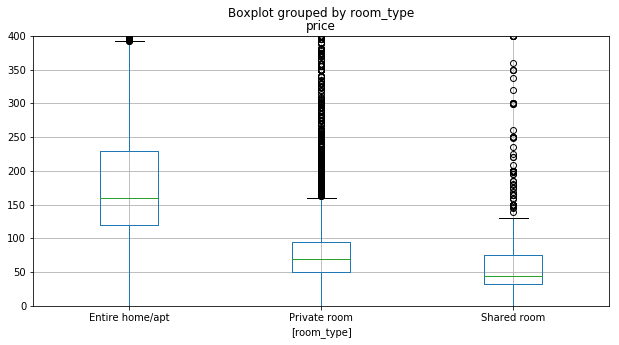

In [376]:
airbnb[['room_type', 'price']].boxplot(by = 'room_type', figsize=(10,5))
airbnb[['room_type', 'price']].boxplot(by = 'room_type', figsize=(10,5))
plt.ylim(0, 400)

   From all the data and visualization, airbnb is really popular if it is near to the Manhattan city. From the data, most of people prefer to stay at airbnb than in a hotel. From google search, average price paid on a Hotel is about $300 in NYC and $216 in Manhattan, which is still higher price than airbnb which is about $197 in Manhattan and about $153 in NYC. 

   From all the data and visualization, it is more clear that staying in an airbnb is a better choice when it comes to pricing. 